# The laminar thickness covariance matrix and gradients

In [1]:
import os, glob
import numpy as np
import pandas as pd
import seaborn as sns
from IPython.display import Image, display
import helpers, datasets, surfaces, matrices

sns.set_style('ticks')

DATA_DIR = '../data/'
OUTPUT_DIR = '../output/'
SRC_DIR = '../src/'

/home/asaberi/laminar_gradients/laminar_gradients_conda/lib/python3.9/site-packages/nilearn/datasets/__init__.py:93: FutureWarning: Fetchers from the nilearn.datasets module will be updated in version 0.9 to return python strings instead of bytes and Pandas dataframes instead of Numpy arrays.
  warn("Fetchers from the nilearn.datasets module will be "


## a) BigBrain map of cortical layers
Screenshot from the BigBrain [web viewer](https://interactive-viewer.apps.hbp.eu/#/a:juelich:iav:atlas:v1.0.0:1/t:minds:core:referencespace:v1.0.0:a1655b99-82f1-420f-a3c2-fe80fd4c8588/p:juelich:iav:atlas:v1.0.0:3/@:0.0.0.-W000.._eCwg.2-FUe3._-s_W.2_evlu..7LIx..2eee0~.1HOUW~.LVQu..Rfu) (at X = -44.207)

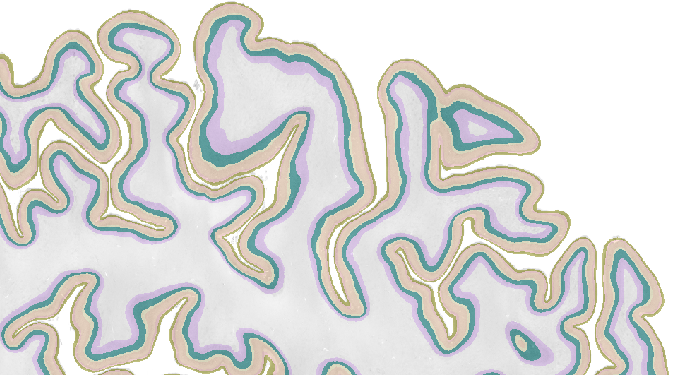

In [2]:
laminar_thickness_orig = helpers.downsample(datasets.load_laminar_thickness(normalize_by_total_thickness=False))

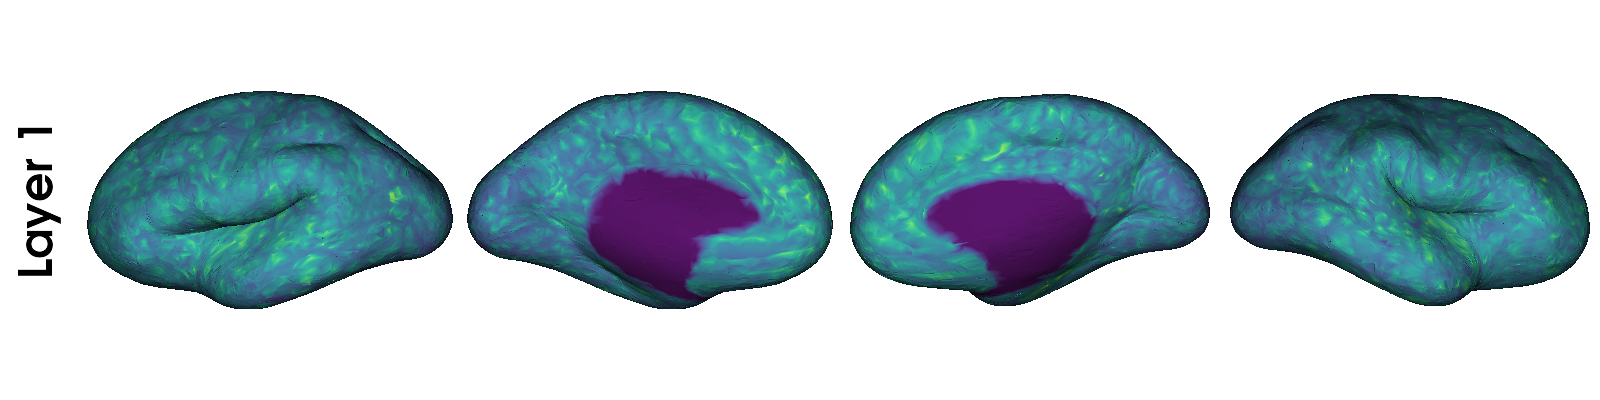

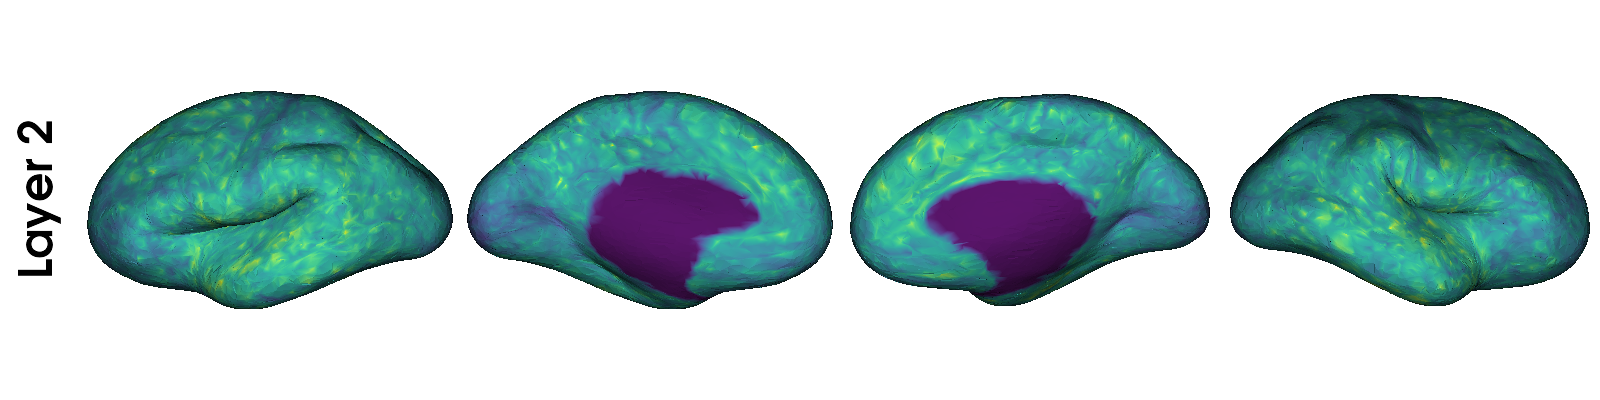

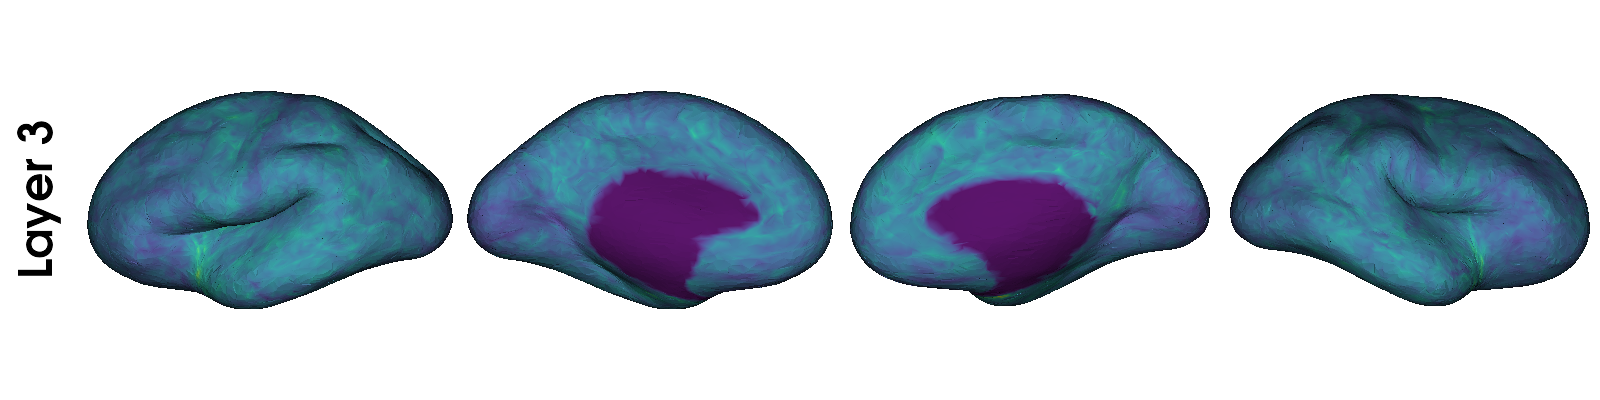

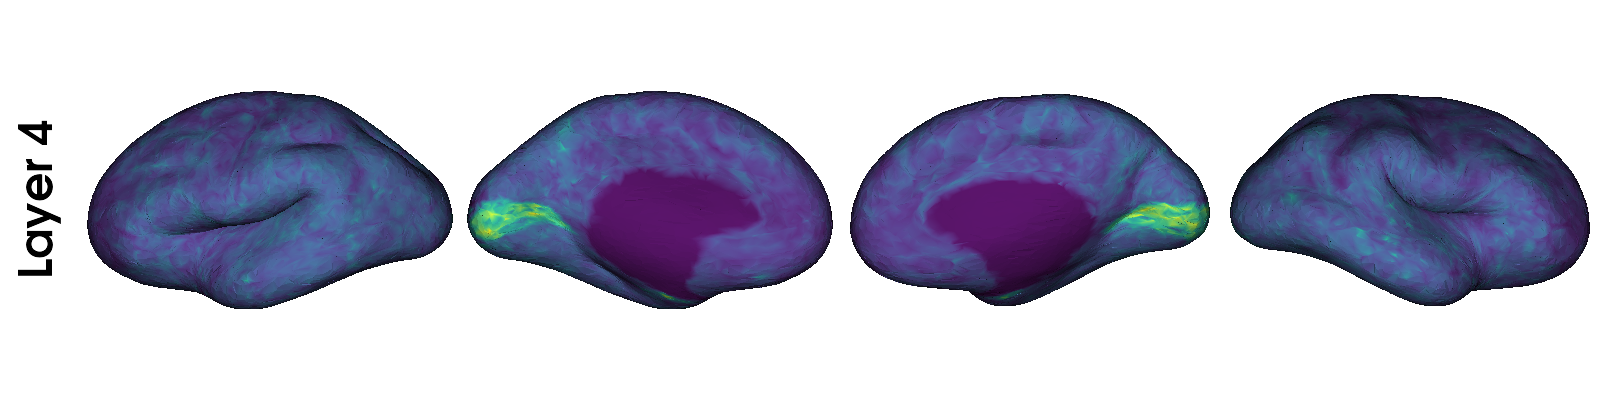

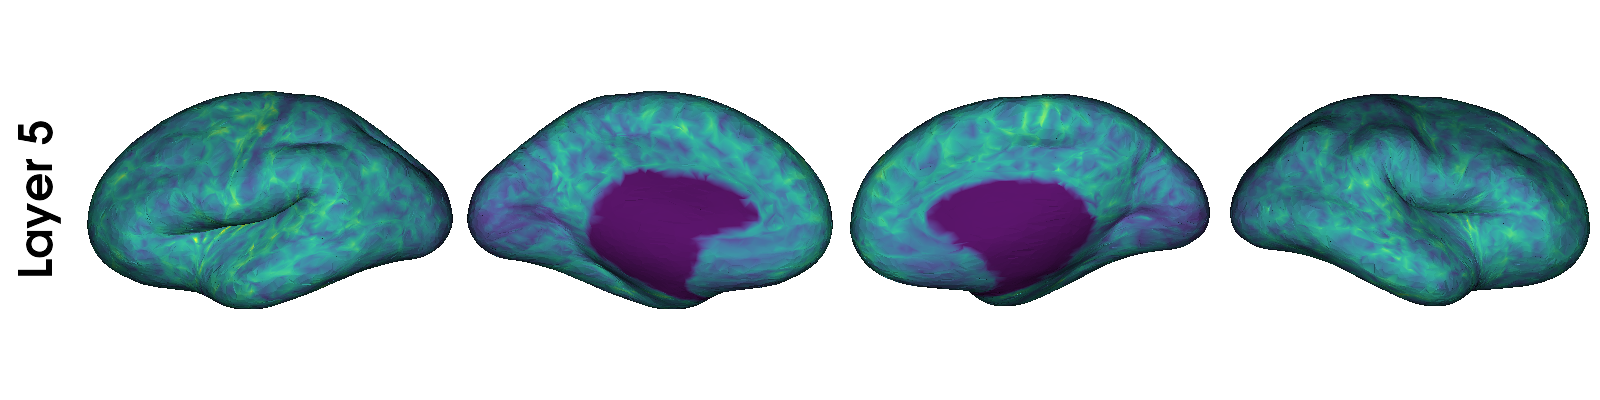

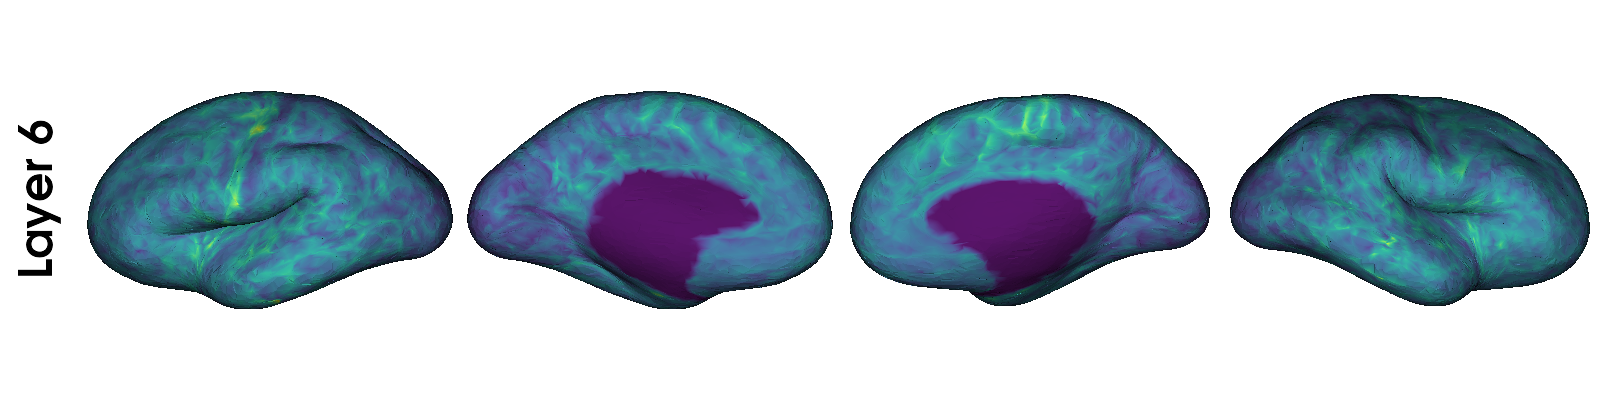

In [3]:
for num in range(1, 7):
    p = helpers.plot_surface(
        np.concatenate([laminar_thickness_orig['L'][:, num-1], laminar_thickness_orig['R'][:, num-1]]),
        inflate=True,
        label_text={'left':[f'Layer {num}']},
    )
    display(p)

## b) Pre-processing steps

Map of cortical types

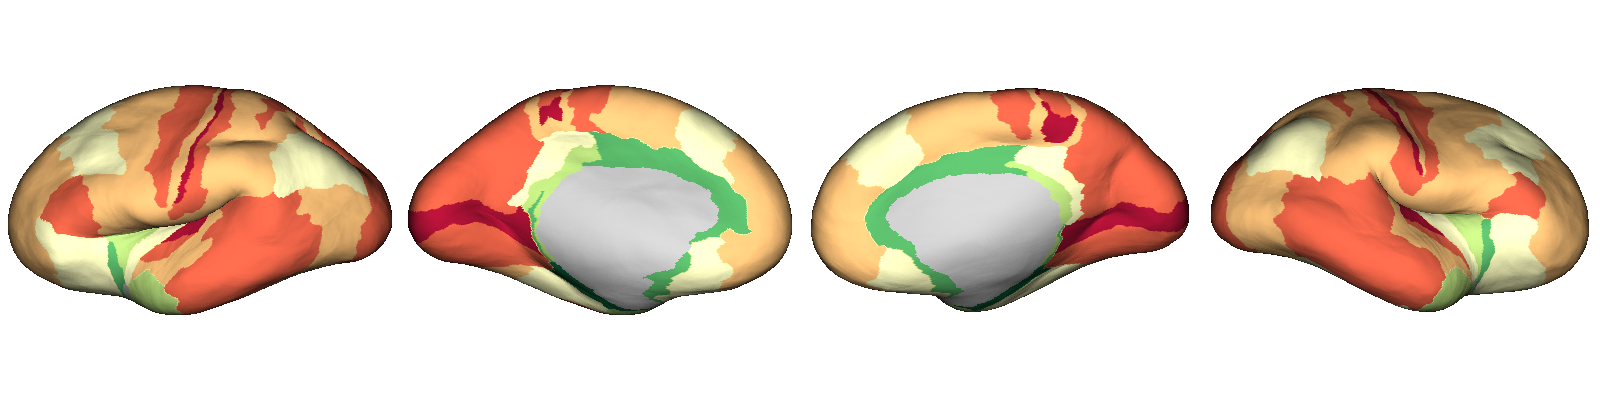

In [6]:
ctypes = surfaces.CorticalTypes(exc_regions=None, downsampled=False)

helpers.plot_surface(
    ctypes.surf_data,
    inflate=True,
    cmap='RdYlGn_r',
    plot_downsampled=False,
)

Note: The mask on the figure is created manually

Smoothing disc

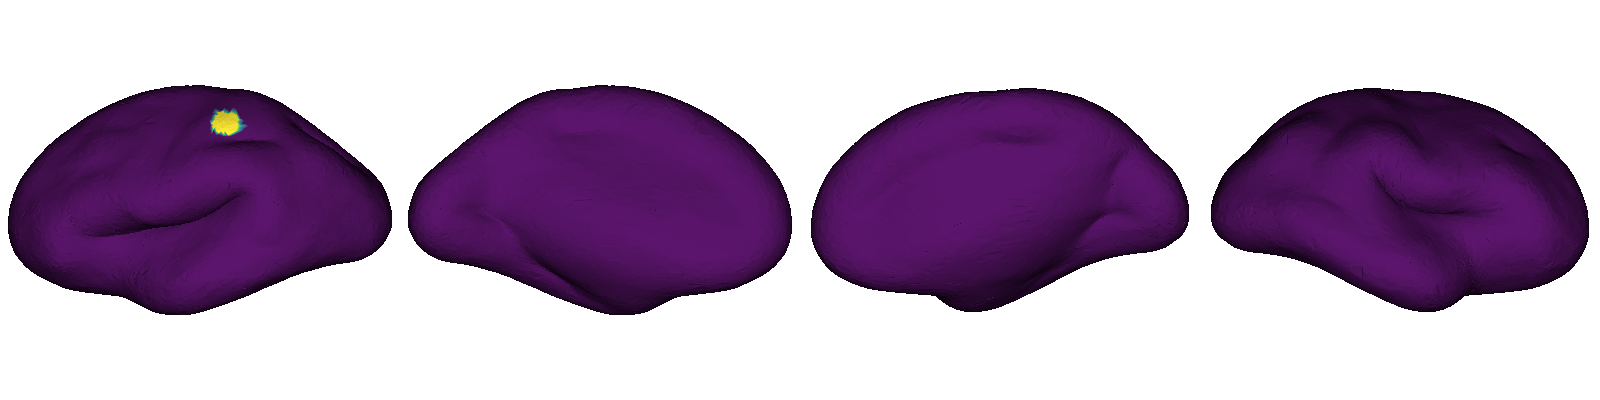

In [4]:
smoothed_laminar_thickness, discs = helpers.disc_smooth(laminar_thickness_orig, 10)

helpers.plot_surface(
    np.concatenate([discs['L'][2000].astype('int')*30, np.zeros(datasets.N_VERTICES_HEM_BB_ICO5)]),
    layout_style='row',
    inflate=True
)

Total thickness

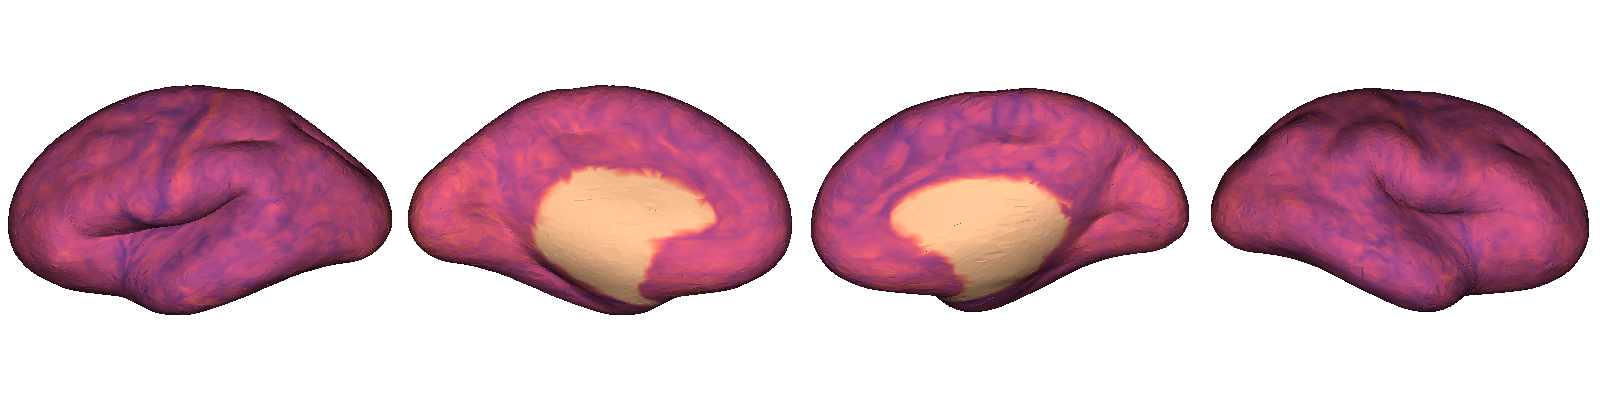

In [5]:
total_thickness = np.concatenate([laminar_thickness_orig['L'], laminar_thickness_orig['R']]).sum(axis=1)
helpers.plot_surface(
    total_thickness,
    inflate=True,
    cmap='flare',
)

SJH Parcellation map

Created using Surf Ice (1.0.20211006+ 64-bit ARM Cocoa LLVM StaticPythonBridge) by plotting the overlay of `src/tpl-bigbrain_hemi-L_desc-sjh_parcellation.label.gii` on the `src/tpl-bigbrain_hemi-L_desc-mid.surf.inflate.gii`

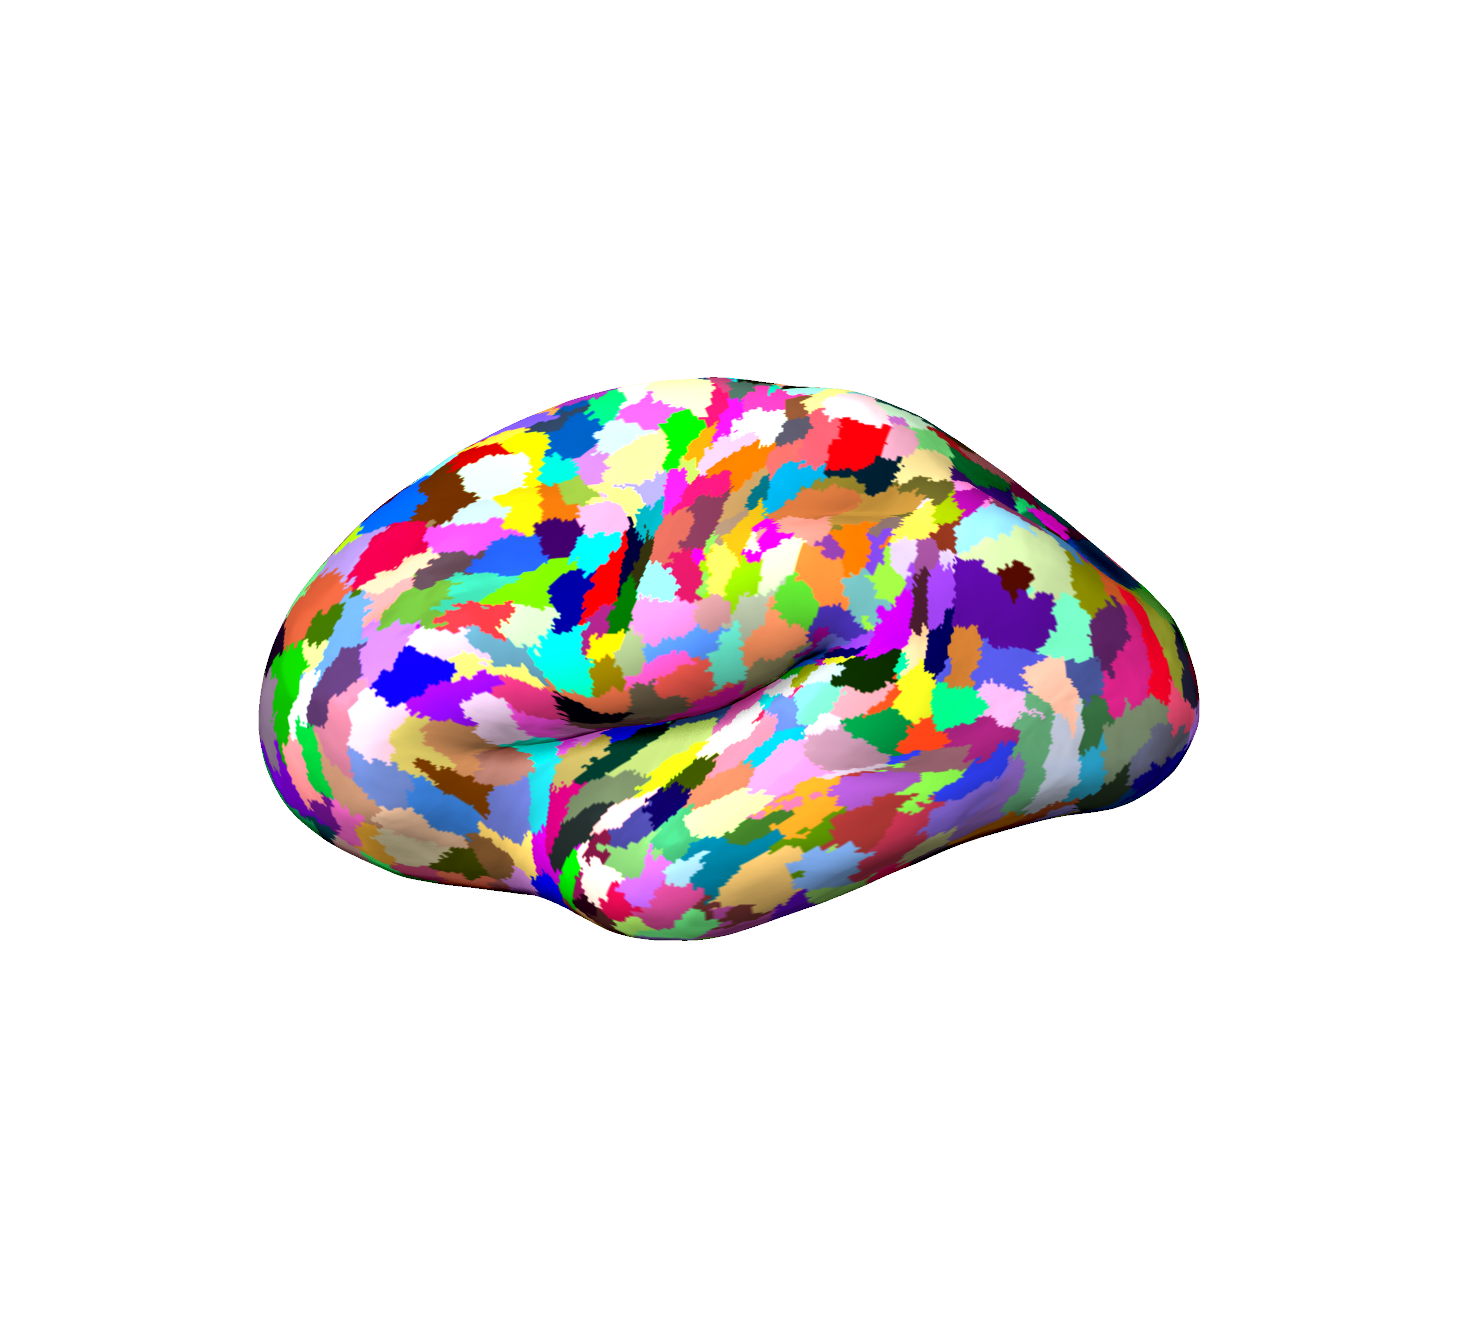

## c) Parcellated laminar thickness profiles

In [2]:
ltc = matrices.MicrostructuralCovarianceMatrix('thickness', parcellation_name='sjh')

Loading the matrix from /home/asaberi/laminar_gradients/code/../output/ltc/parc-sjh_curv-smooth-10_exc-adysgranular_metric-parcor/matrix.npz


/home/asaberi/laminar_gradients/code/matrices.py:1445: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(concat_parcellated_input_data.index.tolist(), rotation=90)


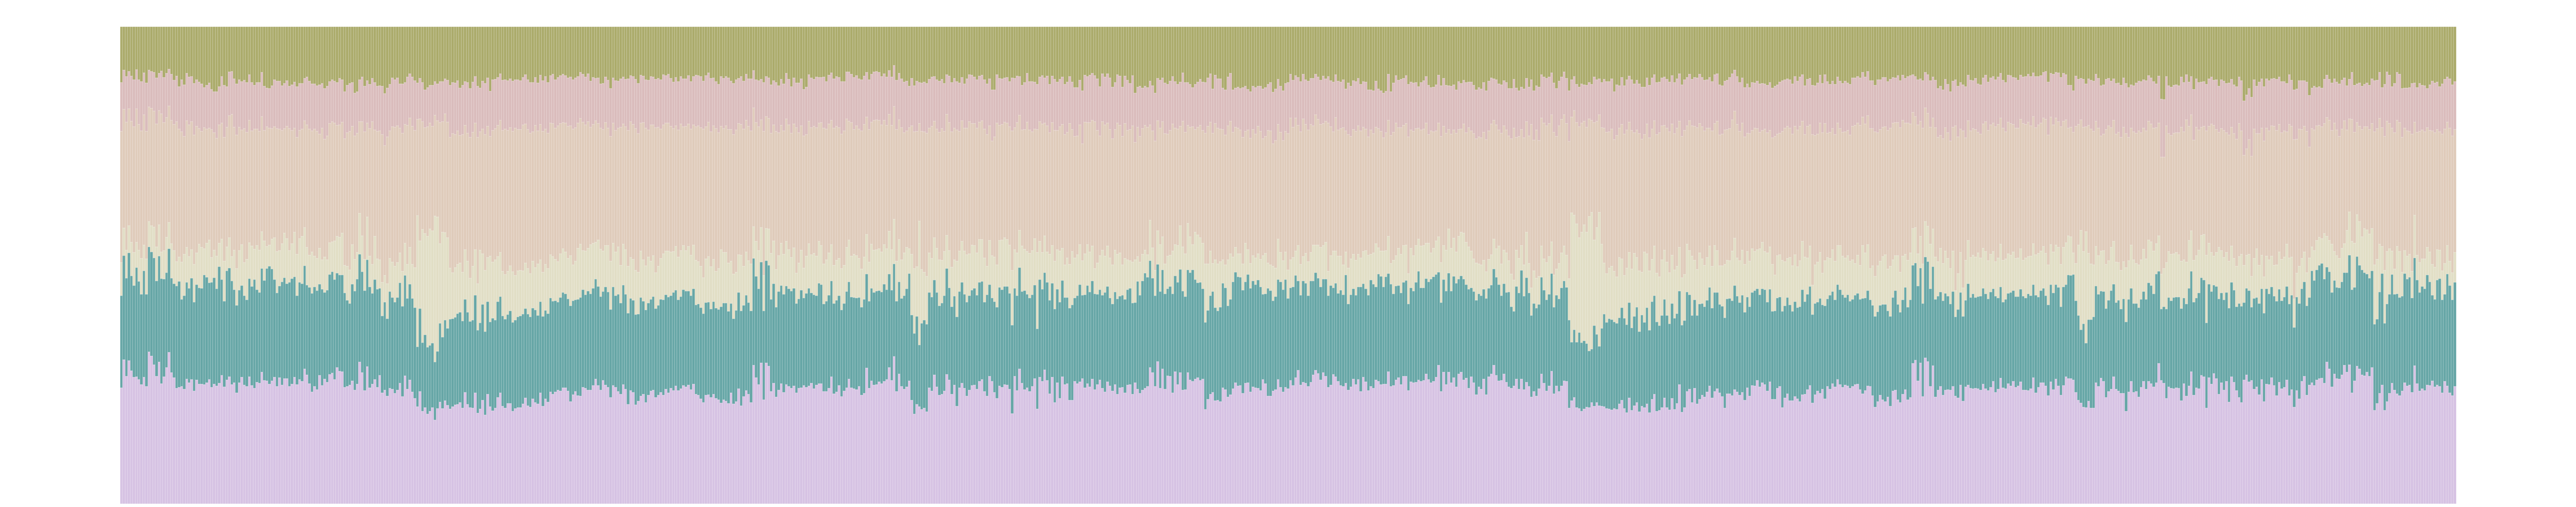

In [8]:
ltc.plot_parcels_profile()

## d) Laminar thickness covariance matrix

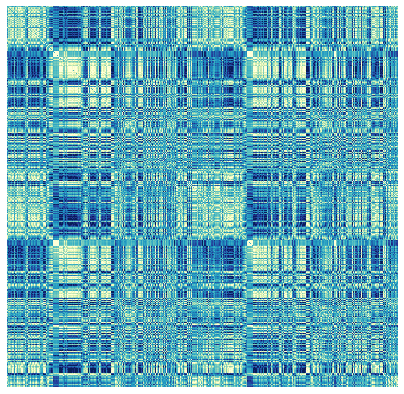

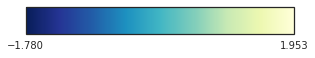

In [9]:
ltc.plot()

## e) Laminar thickness covariance gradient

In [3]:
ltcg = surfaces.MicrostructuralCovarianceGradients(ltc, n_components_report=1)

Loading the matrix from /home/asaberi/laminar_gradients/code/../output/ltc/parc-sjh_curv-smooth-10_exc-adysgranular_metric-parcor/matrix.npz


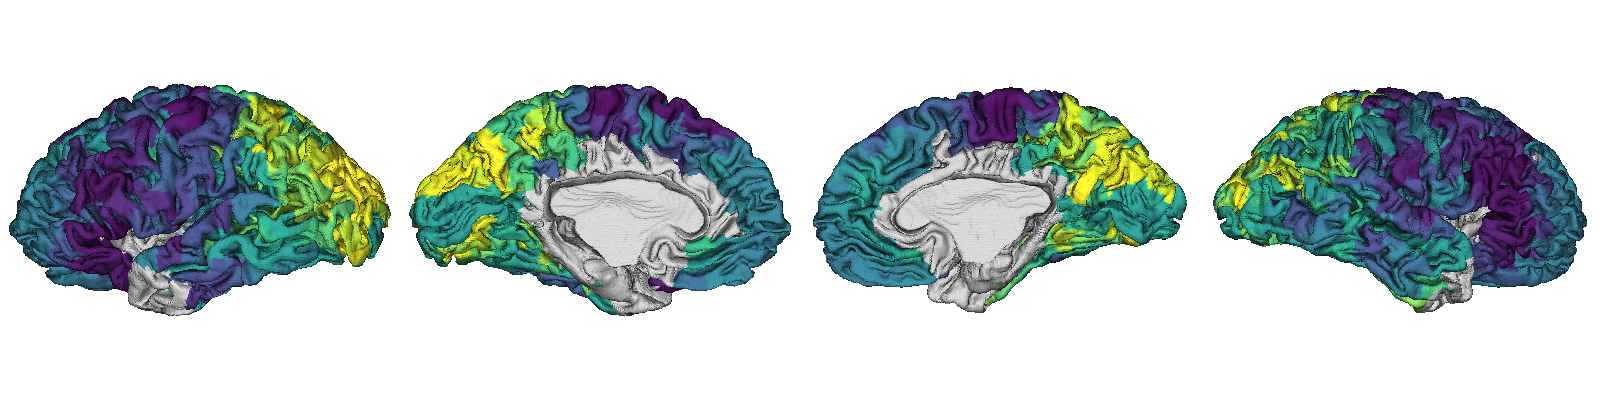

In [12]:
ltcg.plot(columns=['LTC G1'])

## f) LTC reordered by LTC G1

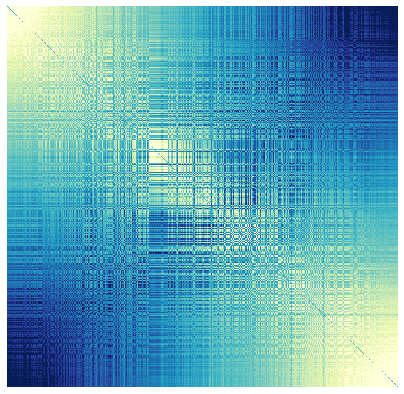

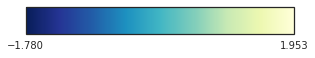

In [11]:
ltcg.plot_reordered_matrix()

## g) Relative thickness of individual layers across LTC G1

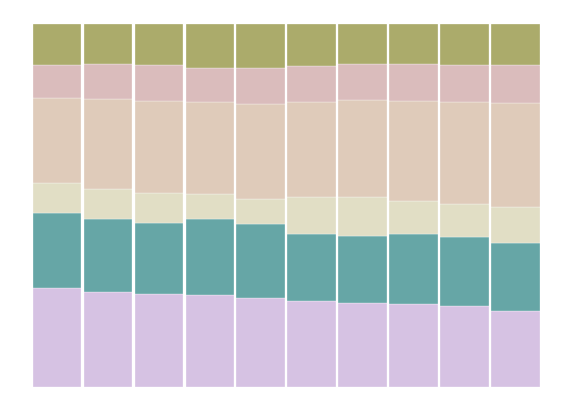

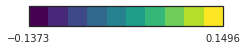

In [13]:
ltcg.plot_binned_profile()

/home/asaberi/laminar_gradients/code/datasets.py:396: RuntimeWarning: invalid value encountered in true_divide
  laminar_thickness[hem] /= laminar_thickness[hem].sum(axis=1, keepdims=True)


Calculating correlations with variogram test (parcellated)
Creating 1000 surrogates based on variograms in /home/asaberi/laminar_gradients/code/../output/ltc/parc-sjh_curv-smooth-10_exc-adysgranular_metric-parcor/gradients_approach-dm_kernel-normalized_angle_sparsity-09_n-10/variogram_surrogates_LTC G1_nperm-1000_nparcels-895.npz
Finding parcel centers in L hemisphere
Finding parcel centers in R hemisphere

Running geodesic distance in hemisphere L
Parcel: 0 

/home/asaberi/laminar_gradients/laminar_gradients_conda/lib/python3.9/site-packages/pandas/core/indexing.py:1684: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  self.obj[key] = infer_fill_value(value)


1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275 276 277 

LTC G1
Layer 1 relative thickness -0.054330
Layer 2 relative thickness  0.424242
Layer 3 relative thickness  0.736374
Layer 4 relative thickness  0.198451
Layer 5 relative thickness -0.338240
Layer 6 relative thickness -0.817341


p-values


LTC G1
Layer 1 relative thickness   0.791
Layer 2 relative thickness   0.000
Layer 3 relative thickness   0.000
Layer 4 relative thickness   0.335
Layer 5 relative thickness   0.019
Layer 6 relative thickness   0.000

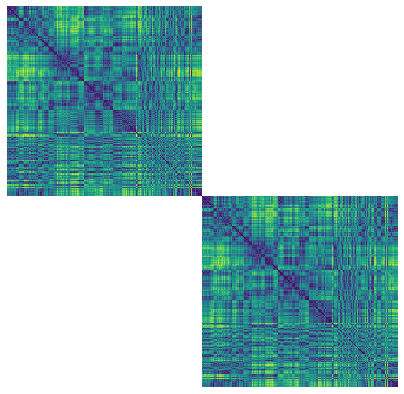

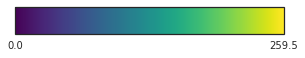

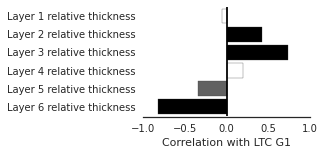

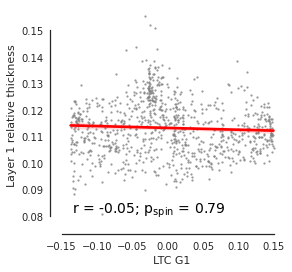

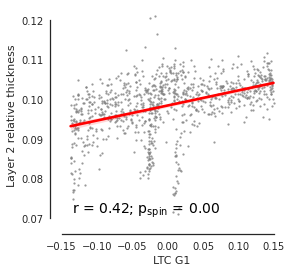

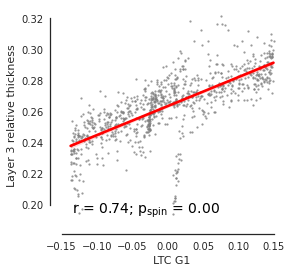

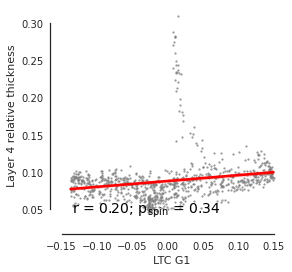

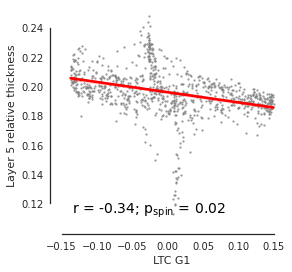

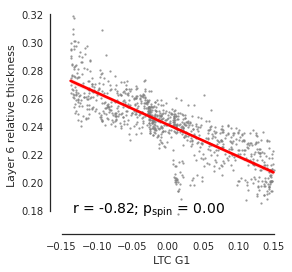

In [14]:
laminar_features = surfaces.LaminarFeatures(parcellation_name='sjh')
r, p = ltcg.correlate(
    laminar_features, 
    x_columns=['LTC G1'], 
    y_columns=[f'Layer {n} relative thickness' for n in range(1, 7)]
)
print("\nCorrelation coefficients")
display(r)
print("\np-values")
display(p)